# FRTE Tests and characterisation

Test the expressions and their predictions in pyMelt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyMelt as m
import pandas as pd

In [2]:
klb1 = m.load_phaseDiagram('thermocalc_klb1')

In [3]:
klb1('temperature', pd.Series({'P':2.0, 'F':0.1}))

1431.2939394067027

In [4]:
m.chemistry.matzen.D(pd.Series({'P': 2.0, 
                                'T':klb1('temperature', pd.Series({'P':2.0, 'F':0.1})), 
                                'F':0.1}),
                     mineral = 'olv',
                     element = 'Ni',
                     phaseDiagram = klb1
                     )

6.044899378995623

In [10]:
p = np.linspace(0.01, 6, 100)
x = np.linspace(0, 1, 100)

xx, pp = np.meshgrid(x, p)

D = np.zeros(np.shape(pp))

for i in range(np.shape(pp)[0]):
    for j in range(np.shape(pp)[1]):
        state = pd.Series({'P': pp[i,j], 
                           'T':klb1('temperature', pd.Series({'P':pp[i,j], 'F':xx[i,j]})), 
                           'F': xx[i,j]})
        D[i,j] = m.chemistry.matzen.D(state, 'cpx', 'Ni', phaseDiagram=klb1)


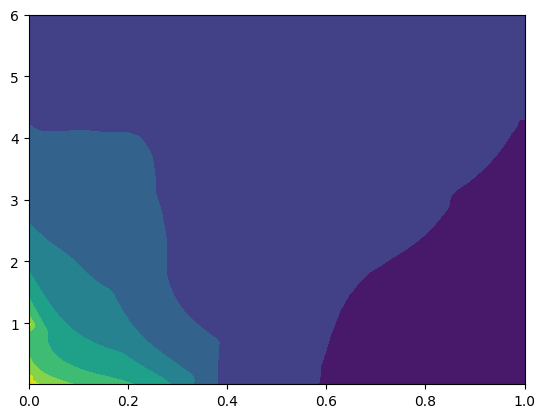

In [11]:
f, a = plt.subplots()

a.contourf(xx, pp, D)

plt.show()